#Importing Libraries


In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

#Loading the dataset

In [5]:
dataset=pd.read_csv('heart.csv')
dataset

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
dataset.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [7]:
dataset.info

<bound method DataFrame.info of      age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  ou

In [8]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [9]:
temp_dict = {}
for i in dataset.columns:
    temp_dict[i] = dataset[i].value_counts().shape[0]
    
unique_value = pd.DataFrame(temp_dict, index=['unique values']).transpose()
unique_value # checking number of unique values in each column

,unique values
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


In [10]:
print(dataset.duplicated().sum())
df=dataset.drop_duplicates(keep="first")
print(dataset.duplicated().sum())
print(dataset.shape)

1
1
(303, 14)


#Exploring the data(EDA)

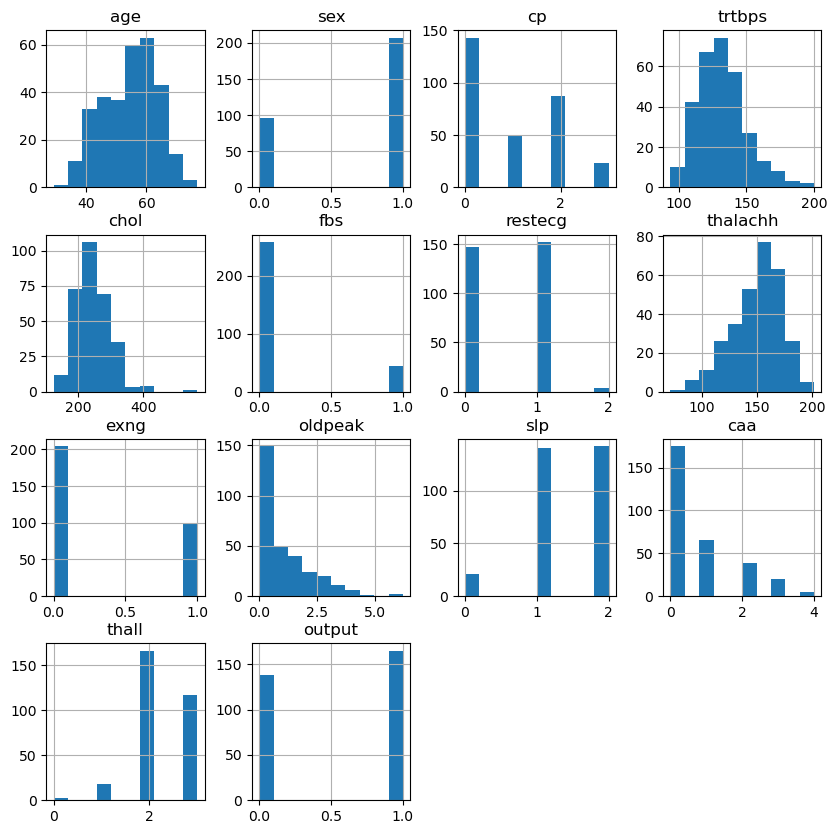

In [11]:
p = dataset.hist(figsize = (10,10))

In [12]:
dataset['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

<AxesSubplot:ylabel='count'>

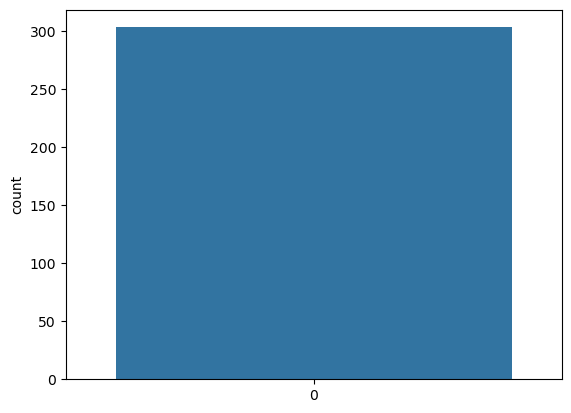

In [13]:
sns.countplot(dataset['output'])

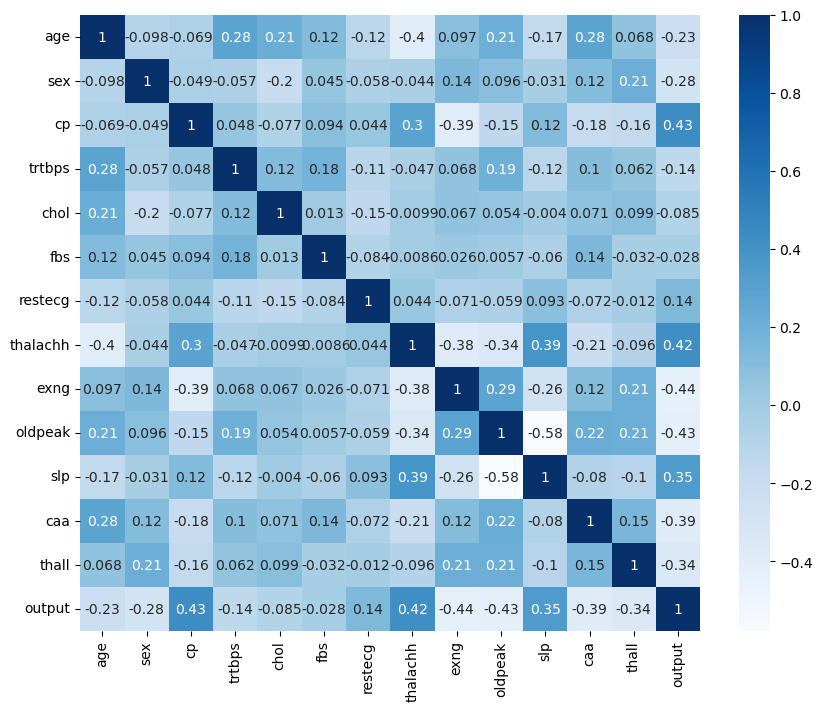

In [14]:
plt.figure(figsize=(10,8))
p = sns.heatmap(dataset.corr(),cmap="Blues", annot=True)

In [15]:
cat_cols = ['sex','chest pain type','fasting blood sugar','resting ecg','exercise angina','ST slope'] # categorical variables
con_cols = ['age','resting bp s','cholesterol','max heart rate','oldpeak'] # continuous variables
target_col = ['output'] # target / dependant variable

### Continuous data

## Categorical data

### Relation of data with target

In [16]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [17]:
dataset.shape

(303, 14)

In [18]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

#Splitting the dataset into the Training set and Test set

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train[:, 3:8]=sc.fit_transform(X_train[:,3:8])
X_test[:, 3:8]=sc.transform(X_test[:, 3:8])

#Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

/Users/maanaav/miniforge3/envs/ip/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Predictive Accuracy achieved for Logistic Regression:',accuracy_score(y_test, y_pred)*100)
acc_lr=accuracy_score(y_test, y_pred)*100

[[21  6]
 [ 3 31]]
Predictive Accuracy achieved for Logistic Regression: 85.24590163934425


In [23]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average='binary')
print('Precision:',precision*100)

from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average='binary')
print('Recall:',recall*100)

from sklearn.metrics import f1_score
score = f1_score(y_test, y_pred, average='binary')
print('F1-score:',score*100)

Precision: 83.78378378378379
Recall: 91.17647058823529
F1-score: 87.32394366197184


#SVM


In [24]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Predictive Accuracy achieved for SVM:',accuracy_score(y_test, y_pred)*100)

[[15 12]
 [ 6 28]]
Predictive Accuracy achieved for SVM: 70.49180327868852


In [26]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average='binary')
print('Precision:',precision*100)

from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average='binary')
print('Recall:',recall*100)

from sklearn.metrics import f1_score
score = f1_score(y_test, y_pred, average='binary')
print('F1-score:',score*100)

Precision: 70.0
Recall: 82.35294117647058
F1-score: 75.67567567567566


As we have a higher recall for both Logistic regression and SVM(how many of the actual positive instances our model was able to predict), we can say that it is a optimal model, since we will be classifying a larger number of patients having heart disease(As the proportion of having a heart disease based on the features is greater in the given dataset).  precision is lower because out of a large number of patients predicted having heart disease some of them won’t actually have heart disease upon further diagnosis. 

#KNN


In [27]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Predictive Accuracy achieved for KNN:',accuracy_score(y_test, y_pred)*100)
acc_knn=accuracy_score(y_test, y_pred)*100
str(acc_knn)

[[16 11]
 [ 2 32]]
Predictive Accuracy achieved for KNN: 78.68852459016394


'78.68852459016394'

In [29]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average='binary')
print('Precision:',precision*100)

from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average='binary')
print('Recall:',recall*100)

from sklearn.metrics import f1_score
score = f1_score(y_test, y_pred, average='binary')
print('F1-score:',score*100)

Precision: 74.4186046511628
Recall: 94.11764705882352
F1-score: 83.11688311688312


#Naive Bayes


In [30]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Predictive Accuracy achieved for Naive Bayes:',accuracy_score(y_test, y_pred)*100)
acc_nb=accuracy_score(y_test, y_pred)*100

[[21  6]
 [ 3 31]]
Predictive Accuracy achieved for Naive Bayes: 85.24590163934425


In [32]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average='binary')
print('Precision:',precision*100)

from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average='binary')
print('Recall:',recall*100)

from sklearn.metrics import f1_score
score = f1_score(y_test, y_pred, average='binary')
print('F1-score:',score*100)

Precision: 83.78378378378379
Recall: 91.17647058823529
F1-score: 87.32394366197184


#Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Predictive Accuracy achieved for Decision Tree:',accuracy_score(y_test, y_pred)*100)
acc_dt=accuracy_score(y_test, y_pred)*100

[[22  5]
 [ 8 26]]
Predictive Accuracy achieved for Decision Tree: 78.68852459016394


In [35]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average='binary')
print('Precision:',precision*100)

from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average='binary')
print('Recall:',recall*100)

from sklearn.metrics import f1_score
score = f1_score(y_test, y_pred, average='binary')
print('F1-score:',score*100)

Precision: 83.87096774193549
Recall: 76.47058823529412
F1-score: 80.0


#Ensemble

#Random Forest 

In [36]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Predictive Accuracy achieved for RFC:',accuracy_score(y_test, y_pred)*100)
acc_rfc=accuracy_score(y_test, y_pred)*100

[[23  4]
 [ 5 29]]
Predictive Accuracy achieved for RFC: 85.24590163934425


In [38]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average='binary')
print('Precision:',precision*100)

from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average='binary')
print('Recall:',recall*100)

from sklearn.metrics import f1_score
score = f1_score(y_test, y_pred, average='binary')
print('F1-score:',score*100)

Precision: 87.87878787878788
Recall: 85.29411764705883
F1-score: 86.56716417910447


#XGBoost


In [39]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Predictive Accuracy achieved for XGBoost:',accuracy_score(y_test, y_pred)*100)

[[21  6]
 [ 7 27]]
Predictive Accuracy achieved for XGBoost: 78.68852459016394


In [41]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average='binary')
print('Precision:',precision*100)

from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average='binary')
print('Recall:',recall*100)

from sklearn.metrics import f1_score
score = f1_score(y_test, y_pred, average='binary')
print('F1-score:',score*100)

Precision: 81.81818181818183
Recall: 79.41176470588235
F1-score: 80.59701492537314


In [42]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 78.55 %
Standard Deviation: 3.62 %


#AdaBoost

In [43]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification

base_estimator = DecisionTreeClassifier(max_depth=1)
ada = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=100, random_state=42)
ada.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=100, random_state=42)

In [44]:
y_pred = ada.predict(X_test)

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy = ada.score(X_test, y_test)
print('Predictive Accuracy achieved for AdaBoost:', accuracy*100)

[[24  3]
 [ 7 27]]
Predictive Accuracy achieved for AdaBoost: 83.60655737704919


In [46]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average='binary')
print('Precision:',precision*100)

from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average='binary')
print('Recall:',recall*100)

from sklearn.metrics import f1_score
score = f1_score(y_test, y_pred, average='binary')
print('F1-score:',score*100)

Precision: 90.0
Recall: 79.41176470588235
F1-score: 84.375


#Gradient Boosting

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

In [48]:
clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [49]:
y_pred1 = clf.predict(X_test)

In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy = clf.score(X_test, y_test)
print('Predictive Accuracy achieved for AdaBoost:', accuracy*100)

[[24  3]
 [ 7 27]]
Predictive Accuracy achieved for AdaBoost: 80.32786885245902


In [51]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred1, average='binary')
print('Precision:',precision*100)

from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred1, average='binary')
print('Recall:',recall*100)

from sklearn.metrics import f1_score
score = f1_score(y_test, y_pred1, average='binary')
print('F1-score:',score*100)

Precision: 82.35294117647058
Recall: 82.35294117647058
F1-score: 82.35294117647058


#ANN


In [52]:
ann = tf.keras.models.Sequential()

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-03-12 10:50:43.859672: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-12 10:50:43.860284: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [53]:
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dropout(0.2))
ann.add(tf.keras.layers.Dense(units=6, activation='tanh'))
ann.add(tf.keras.layers.Dropout(0.2))
ann.add(tf.keras.layers.Dense(units=5, activation='tanh'))
ann.add(tf.keras.layers.Dropout(0.2))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [54]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
ann.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [55]:
ann.fit(X_train, y_train, batch_size = 24, epochs = 100, validation_data=(X_test, y_test))

2023-03-12 10:50:44.071472: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-03-12 10:50:44.074335: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/100


2023-03-12 10:50:44.413886: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 1s 80ms/step - loss: 0.7301 - accuracy: 0.4876 - val_loss: 0.6888 - val_accuracy: 0.5574
Epoch 2/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7854 - accuracy: 0.4167

2023-03-12 10:50:45.370126: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 0s 17ms/step - loss: 0.7126 - accuracy: 0.5041 - val_loss: 0.6928 - val_accuracy: 0.5574
Epoch 3/100
11/11 [==============================] - 0s 14ms/step - loss: 0.7211 - accuracy: 0.5000 - val_loss: 0.6884 - val_accuracy: 0.5574
Epoch 4/100
11/11 [==============================] - 0s 14ms/step - loss: 0.7095 - accuracy: 0.5289 - val_loss: 0.6828 - val_accuracy: 0.5574
Epoch 5/100
11/11 [==============================] - 0s 14ms/step - loss: 0.6932 - accuracy: 0.5496 - val_loss: 0.6487 - val_accuracy: 0.6885
Epoch 6/100
11/11 [==============================] - 0s 13ms/step - loss: 0.6784 - accuracy: 0.5992 - val_loss: 0.6382 - val_accuracy: 0.6066
Epoch 7/100
11/11 [==============================] - 0s 14ms/step - loss: 0.6695 - accuracy: 0.6281 - val_loss: 0.6240 - val_accuracy: 0.8197
Epoch 8/100
11/11 [==============================] - 0s 13ms/step - loss: 0.6360 - accuracy: 0.6942 - val_loss: 0.6003 - val_accuracy: 0.8033
Epoch 9/100
11/11 

In [56]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Predictive Accuracy achieved for ANN:', accuracy_score(y_test, y_pred)*100)

[[24  3]
 [ 7 27]]
Predictive Accuracy achieved for ANN: 83.60655737704919


In [57]:
precision = precision_score(y_test, y_pred, average='binary')
print('Precision:',precision*100)

recall = recall_score(y_test, y_pred, average='binary')
print('Recall:',recall*100)

score = f1_score(y_test, y_pred, average='binary')
print('F1-score:',score*100)

Precision: 90.0
Recall: 79.41176470588235
F1-score: 84.375


In [58]:
ann = tf.keras.models.Sequential()

In [59]:
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=5, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [60]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [61]:
ann.fit(X_train, y_train, batch_size = 24, epochs = 100)

Epoch 1/100
 1/11 [=>............................] - ETA: 3s - loss: 1.3769 - accuracy: 0.4167

2023-03-12 10:51:00.891699: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 1s 19ms/step - loss: 1.0635 - accuracy: 0.4587
Epoch 2/100
11/11 [==============================] - 0s 11ms/step - loss: 0.7194 - accuracy: 0.4711
Epoch 3/100
11/11 [==============================] - 0s 11ms/step - loss: 0.6766 - accuracy: 0.6281
Epoch 4/100
11/11 [==============================] - 0s 11ms/step - loss: 0.6848 - accuracy: 0.5950
Epoch 5/100
11/11 [==============================] - 0s 10ms/step - loss: 0.6740 - accuracy: 0.6198
Epoch 6/100
11/11 [==============================] - 0s 11ms/step - loss: 0.6559 - accuracy: 0.6818
Epoch 7/100
11/11 [==============================] - 0s 10ms/step - loss: 0.6521 - accuracy: 0.6612
Epoch 8/100
11/11 [==============================] - 0s 10ms/step - loss: 0.6500 - accuracy: 0.7355
Epoch 9/100
11/11 [==============================] - 0s 10ms/step - loss: 0.6432 - accuracy: 0.7397
Epoch 10/100
11/11 [==============================] - 0s 9ms/step - loss: 0.6378 - accuracy: 0.7562
Epoch 11/100

In [62]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]]


2023-03-12 10:51:12.752260: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Predictive Accuracy achieved for ANN:', accuracy_score(y_test, y_pred)*100)

[[20  7]
 [ 5 29]]
Predictive Accuracy achieved for ANN: 80.32786885245902


In [64]:
model = tf.keras.models.Sequential()

In [65]:
model.add(tf.keras.layers.Dense(units=8, activation='relu'))
model.add(tf.keras.layers.Dense(units=7, activation='tanh'))
model.add(tf.keras.layers.Dense(units=7, activation='tanh'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [66]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

In [67]:
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [68]:
model.fit(X_train, y_train, batch_size = 24, epochs = 100, validation_data=(X_test, y_test))

Epoch 1/100


2023-03-12 10:51:13.165200: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 1s 44ms/step - loss: 0.7039 - accuracy: 0.5455 - val_loss: 0.6442 - val_accuracy: 0.6066
Epoch 2/100
 1/11 [=>............................] - ETA: 0s - loss: 0.6490 - accuracy: 0.5417

2023-03-12 10:51:14.023744: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 0s 13ms/step - loss: 0.6412 - accuracy: 0.6446 - val_loss: 0.6001 - val_accuracy: 0.6885
Epoch 3/100
11/11 [==============================] - 0s 13ms/step - loss: 0.5767 - accuracy: 0.7190 - val_loss: 0.5108 - val_accuracy: 0.8197
Epoch 4/100
11/11 [==============================] - 0s 13ms/step - loss: 0.5086 - accuracy: 0.7727 - val_loss: 0.5133 - val_accuracy: 0.7705
Epoch 5/100
11/11 [==============================] - 0s 12ms/step - loss: 0.6985 - accuracy: 0.5950 - val_loss: 0.5454 - val_accuracy: 0.7213
Epoch 6/100
11/11 [==============================] - 0s 12ms/step - loss: 0.6543 - accuracy: 0.5661 - val_loss: 0.5920 - val_accuracy: 0.6066
Epoch 7/100
11/11 [==============================] - 0s 13ms/step - loss: 0.5300 - accuracy: 0.7562 - val_loss: 0.4752 - val_accuracy: 0.7541
Epoch 8/100
11/11 [==============================] - 0s 12ms/step - loss: 0.4621 - accuracy: 0.8099 - val_loss: 0.4855 - val_accuracy: 0.8361
Epoch 9/100
11/11 

# Ensemble

In [78]:
from sklearn.neural_network import MLPClassifier

# Define the base models
base_estimator = DecisionTreeClassifier(max_depth=1)
models = [
    ('lr', LogisticRegression(random_state = 0)),
    ('nb', GaussianNB()),
    ('rf', RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)),
    ('knn', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('ada', AdaBoostClassifier(base_estimator=base_estimator, n_estimators=100, random_state=42))
]

# Train the base models and make predictions on the test set
meta_X_train = []
meta_X_test = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    meta_X_train.append(model.predict(X_train))
    meta_X_test.append(y_pred)
    print(f"{name} recall score: {recall_score(y_test, y_pred)}")

lr recall score: 0.9117647058823529
nb recall score: 0.9117647058823529
rf recall score: 0.8529411764705882
knn recall score: 0.9411764705882353
gb recall score: 0.8235294117647058
ada recall score: 0.7941176470588235


/Users/maanaav/miniforge3/envs/ip/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [79]:
# Train the meta model on the predictions of the base models
meta_X_train = np.array(meta_X_train).T
meta_X_test = np.array(meta_X_test).T
meta_model = MLPClassifier(hidden_layer_sizes=(50, 25))
meta_model.fit(meta_X_train, y_train)
y_pred_ensemble = meta_model.predict(meta_X_test)

# Evaluate the performance of the ensemble model
precision = precision_score(y_test, y_pred_ensemble, average='binary')
print('Precision:',precision*100)

recall = recall_score(y_test, y_pred_ensemble, average='binary')
print('Recall:',recall*100)

score = f1_score(y_test, y_pred_ensemble, average='binary')
print('F1-score:',score*100)

Precision: 81.81818181818183
Recall: 79.41176470588235
F1-score: 80.59701492537314


# Conclusion

In [82]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier
# Define a voting classifier as the meta model
meta_model = VotingClassifier(estimators=models, voting='soft')

# Define a pipeline to oversample the minority class and standardize the features
pipeline = Pipeline([
    # ('oversample', RandomOverSampler()),
    ('scaler', StandardScaler()),
    ('model', meta_model)
])

# Train the ensemble model on the training set
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the performance of the ensemble model
precision = precision_score(y_test, y_pred, average='binary')
print('Precision:',precision*100)

recall = recall_score(y_test, y_pred, average='binary')
print('Recall:',recall*100)

score = f1_score(y_test, y_pred, average='binary')
print('F1-score:',score*100)

Precision: 84.21052631578947
Recall: 94.11764705882352
F1-score: 88.88888888888889


1. We implemented multiple models using various algorithms like logistic regression, support vector machine, k-nearest neighbours, naive bayes, decision tree, random forest classifier, and xgboost. We also built a artificial neural network and trained it using the existing dataset.
2. As we have a higher recall for models which were built using Naive Bayes, KNN, and Decision tree (how many of the actual positive instances our model was able to predict), we can say that it is a optimal model, since we will be classifying a larger number of patients having heart disease(As the proportion of having a heart disease based on the features is greater in the given dataset). Precision for such a domain(healthcare) should be lower because out of a large number of patients predicted having heart disease some of them won’t actually have heart disease upon further diagnosis. 
3. We observed that Naive Bayes had the highest accuracy among the three algorithms. Followed by an multilayer artificial neural network. While Decision Tree is fast and easy to understand and visualize, it is prone to overfit. As the data is big, one single tree may grow a lot of nodes, which might result in complexity and lead to overfitting which indirectly affects the accuracy of the model. A small change in the data can also result in a significant change in the structure of the decision tree. KNN is a non-parametric algorithm, which implies it does not make assumptions about any underlying patterns in the data. It is a also known as a lazy learner, since it does not go through any training it simply stores the dataset and based on similarity measures(distances between the co-ordinates) assignes a class to the new instance. It is computationally complex and is suitable for dataset with fewer instances. 